# 研报复制

In [2]:
import pickle
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import Formatter
from bisect import bisect_left, bisect_right

fund = pd.read_csv("D:\\work\\project 6 基金持仓预测\\全部基金.csv", encoding="GBK")
mv = pd.read_csv('D:\\work\\project 6 基金持仓预测\\amount_ashare.csv', encoding="utf-8")
sz = pd.read_csv("D:\\work\\project 6 基金持仓预测\\K线导出_000001_日线数据.csv", encoding="GBK")
fund1 = pd.read_csv("D:\\work\\project 6 基金持仓预测\\股票型.csv", encoding="GBK")
CSI500 = pd.read_csv("D:\\work\\project 6 基金持仓预测\\CSI500.csv", encoding="GBK")
fund2 = pd.read_csv("D:\\work\\project 6 基金持仓预测\\50.csv", encoding="GBK")
fund3 = pd.read_csv("D:\\work\\project 6 基金持仓预测\\20.csv", encoding="GBK")

In [3]:
mv["amount"] = mv["amount"]/100000000
mv

,date,amount
0,20040102,152.100091
1,20040105,270.604586
2,20040106,296.075332
3,20040107,293.619081
4,20040108,280.958768
...,...,...
3916,20200218,9997.154801
3917,20200219,10385.495250
3918,20200220,10681.049097
3919,20200221,11707.415518


In [4]:
fund1['发行日期'] = fund1['发行日期'].apply(lambda x: int(x.split('/')[0] + x.split('/')[1].rjust(2,'0') + x.split('/')[2].rjust(2,'0')))
fund2 = fund2[fund2["发行日期"] != '——']
fund2['发行日期'] = fund2['发行日期'].apply(lambda x: int(x.split('/')[0] + x.split('/')[1].rjust(2,'0') + x.split('/')[2].rjust(2,'0')))
fund3 = fund3[fund3["发行日期"] != '——']
fund3['发行日期'] = fund3['发行日期'].apply(lambda x: int(x.replace('-','')))
CSI500['截止日期'] = CSI500['截止日期'].apply(lambda x: int(x.split('/')[0] + x.split('/')[1].rjust(2,'0') + x.split('/')[2].rjust(2,'0')))
sz['交易时间'] = sz['交易时间'].apply(lambda x: int(x.split('/')[0] + x.split('/')[1].rjust(2,'0') + x.split('/')[2].rjust(2,'0')))
sz["收盘价"] = sz["收盘价"].apply(lambda x: float(x.replace(',','')))

[561, 581, 690, 696, 705, 709, 710, 780, 828, 829, 857, 861, 865, 873, 1294, 1335, 1351, 1411, 1441, 1647, 2002, 2002, 2723, 2725, 2744, 2753, 2757, 2758, 2758, 2763, 2770, 2772, 2778, 2797, 2797, 2811, 2811, 2811, 3040, 3412, 3507, 3507, 3507, 3507, 3507, 3507, 3561, 3561, 3605, 3793, 3793, 3889, 3905, 3917]


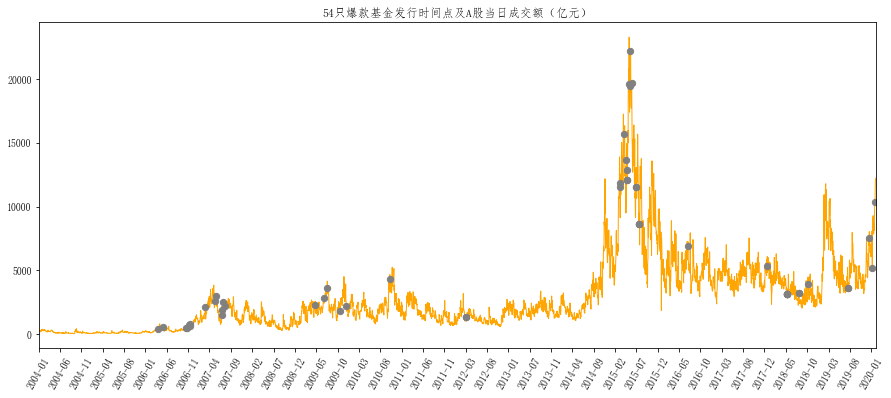

In [5]:
from matplotlib import pyplot as plt
from matplotlib.ticker import Formatter
from pylab import mpl
from datetime import date
mpl.rcParams['font.sans-serif'] = ['FangSong']
mpl.rcParams['axes.unicode_minus'] = False

class MyFormatter(Formatter):
    def __init__(self, dates, fmt='%Y%m'):
        self.dates = dates
        self.fmt = fmt

    def __call__(self, x, pos=0):
        """Return the label for time x at position pos"""
        ind = int(np.round(x))
        if ind >= len(self.dates) or ind < 0:
            return ''
        return pd.to_datetime(self.dates[ind], format="%Y%m%d").strftime(self.fmt)

x = []
y = []
for i in fund1['发行日期']:
    index = pd.Index(mv['date']).get_loc(i)
    x.append(index)
    y.append(mv["amount"].iloc[index])
print(x)

fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(x,y, color='grey', alpha=1, s=40, zorder=2)
ax.plot(np.arange(len(mv)), mv["amount"], color='orange', alpha=2, linewidth=1, zorder=1)
plt.xticks(np.arange(0, len(mv), 2),rotation=60)
mv['Date1'] = mv["date"].apply(lambda x: str(x))
mv['Date1'] = pd.to_datetime(mv['Date1'])
ax.xaxis.set_major_formatter(MyFormatter(mv["Date1"].values, '%Y-%m'))
ax.set_xticks(ax.get_xticks()[::50])
plt.xlim((0, len(mv)))
ax.set_title("54只爆款基金发行时间点及A股当日成交额（亿元）")
plt.savefig("figure1")
plt.show()

In [6]:
mv = mv.set_index("Date1")
mv1 = mv.resample('1M').mean()
mv1["Year"]=mv1.index.year
mv1["Month"]=mv1.index.month
mv1 = mv1.reset_index()

fund1["Year"] = fund1["发行日期"].apply(lambda x: str(x)).str[:4].apply(lambda x: int(x))
fund1["Month"] = fund1["发行日期"].apply(lambda x: str(x)).str[4:6].apply(lambda x: int(x))

n = 0
for i in fund1[fund1["发行日期"]<=20200101].index:
    y = fund1["Year"].iloc[i]
    m = fund1["Month"].iloc[i]
    j = mv1[(mv1["Year"] == y) & (mv1["Month"] == m)].index.values[0]
    if (mv1["amount"].iloc[j] > mv1["amount"].iloc[j-1]) | (mv1["amount"].iloc[j] > mv1["amount"].iloc[j+1]):
        n = n + 1
    
n/len(fund1[fund1["发行日期"]<=20200101].index)

0.7647058823529411

[561, 581, 690, 696, 705, 709, 710, 780, 828, 829, 857, 861, 865, 873, 1294, 1335, 1351, 1411, 1441, 1647, 2002, 2002, 2723, 2725, 2744, 2753, 2757, 2758, 2758, 2763, 2770, 2772, 2778, 2797, 2797, 2811, 2811, 2811, 3040, 3412, 3507, 3507, 3507, 3507, 3507, 3507, 3561, 3561, 3605, 3793, 3793, 3889, 3905, 3917]


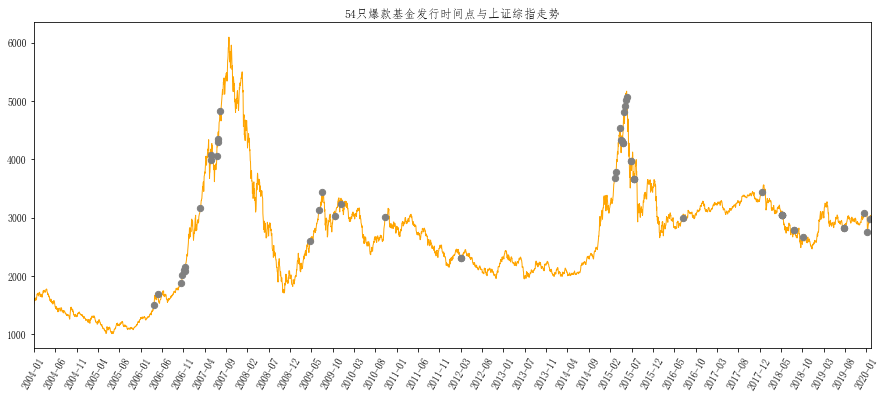

In [7]:
x = []
y = []

for i in fund1['发行日期']:
    index = pd.Index(sz['交易时间']).get_loc(i)
    x.append(index)
    y.append(sz["收盘价"].iloc[index])
print(x)

fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(x,y, color='grey', alpha=1, s=40, zorder=2)
ax.plot(np.arange(len(sz)), sz["收盘价"].values, color='orange', alpha=2, linewidth=1, zorder=1)
plt.xticks(np.arange(0, len(sz), 2),rotation=60)
sz['Date1'] = sz["交易时间"].apply(lambda x: str(x))
sz['Date1'] = pd.to_datetime(sz['Date1'])
ax.xaxis.set_major_formatter(MyFormatter(sz["Date1"].values, '%Y-%m'))
ax.set_xticks(ax.get_xticks()[::50])
plt.xlim((0, len(sz)))
ax.set_title("54只爆款基金发行时间点与上证综指走势")
plt.savefig("figure1")
plt.show()

In [8]:
sz1 = sz.set_index("Date1")
sz1 = sz1.resample('1M').last()
sz1["Year"]=sz1.index.year
sz1["Month"]=sz1.index.month
sz1 = sz1.reset_index()

sz1
n1 = 0
n2 = 0
n3 = 0
for i in fund1[fund1["发行日期"]<=20200101].index:
    y = fund1["Year"].iloc[i]
    m = fund1["Month"].iloc[i]
    a = sz[sz["交易时间"] == fund1["发行日期"].iloc[i]]["收盘价"].values[0]
    j = sz1[(sz1["Year"] == y) & (sz1["Month"] == m)].index.values[0]
    if (a > sz1["收盘价"].iloc[j+1]) & (a > sz1["收盘价"].iloc[j+3]):
        n1 = n1 + 1
    if (a < sz1["收盘价"].iloc[j+1]) & (a < sz1["收盘价"].iloc[j+3]):
        n2 = n2 + 1
    if ((a < sz1["收盘价"].iloc[j+1]) & (a > sz1["收盘价"].iloc[j+3])) | ((a > sz1["收盘价"].iloc[j+1]) & (a < sz1["收盘价"].iloc[j+3])):
        n3 = n3 + 1
    
# n1 = n1/len(fund1[fund1["发行日期"]<=20200101].index)

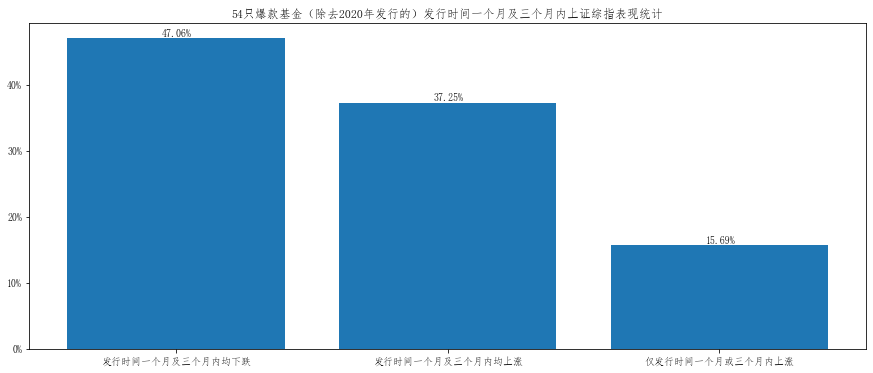

In [9]:
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(15, 6))
s_um = len(fund1[fund1["发行日期"]<=20200101].index)
bars = plt.bar(np.arange(3), [(n1/s_um)*100, (n2/s_um)*100, (n3/s_um)*100])
plt.xticks(np.arange(3), ('发行时间一个月及三个月内均下跌', '发行时间一个月及三个月内均上涨', '仅发行时间一个月或三个月内上涨'))
plt.title("54只爆款基金（除去2020年发行的）发行时间一个月及三个月内上证综指表现统计")
formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.35, yval + .3, '{:.2f}'.format(yval) + '%')
ax.yaxis.set_major_formatter(formatter)
plt.savefig("figure1")
plt.show()

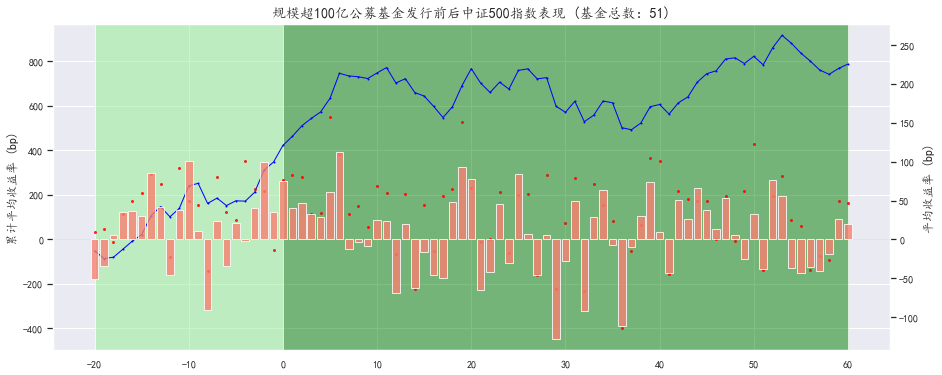

In [12]:
CSI500 = CSI500.sort_values(by='截止日期').reset_index(drop=True)
da_te = CSI500['截止日期']
df = pd.DataFrame()
m = 0
for i in fund1[(fund1["发行日期"]<=20200101) & (fund1["发行日期"]>=20050101)]['发行日期']:
    if len(da_te[da_te == i]) == 0:
            i = da_te[da_te < i].iloc[-1]
    d1 = da_te[da_te[da_te == i].index[0] - 20]
    if da_te[da_te == i].index[0] + 60 > da_te.index[-1]:
            continue
    else:
        d2 = da_te[da_te[da_te == i].index[0] + 60]
    tp = CSI500[(CSI500["截止日期"] >= d1) & (CSI500["截止日期"] <= d2)]['区间涨跌幅[%]'].reset_index(drop=True)
    df = pd.concat([df, tp], axis=1)
    m = m + 1
CAR = np.cumsum(df.mean(axis=1)) * 100
T = df.mean(axis=1) * 100
M = df.median(axis=1) * 100


def align_yaxis_np(ax1, ax2):
    """Align zeros of the two axes, zooming them out by same ratio"""
    axes = np.array([ax1, ax2])
    extrema = np.array([ax.get_ylim() for ax in axes])
    tops = extrema[:, 1] / (extrema[:, 1] - extrema[:, 0])
    # Ensure that plots (intervals) are ordered bottom to top:
    if tops[0] > tops[1]:
        axes, extrema, tops = [a[::-1] for a in (axes, extrema, tops)]

    # How much would the plot overflow if we kept current zoom levels?
    tot_span = tops[1] + 1 - tops[0]

    extrema[0, 1] = extrema[0, 0] + tot_span * (extrema[0, 1] - extrema[0, 0])
    extrema[1, 0] = extrema[1, 1] + tot_span * (extrema[1, 0] - extrema[1, 1])
    [axes[i].set_ylim(*extrema[i]) for i in range(2)]

import seaborn as sns

x = range(-20, 61)
sns.set()
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.axvspan(-20, 0, facecolor='lightgreen', alpha=0.5)
ax1.axvspan(0, 60, facecolor='green', alpha=0.5)
ax1.set_ylabel('累计平均收益率 (bp)', fontsize=12)
ax1.plot(x, CAR, marker='.', color='blue', alpha=1, linewidth=1, markersize=2)
ax1.tick_params('y')
ax1.tick_params(labelsize=10)
ax1.axhline(y=0, color='salmon', linestyle=(0, (1, 1)), alpha=0.6, linewidth=1)
ax2 = ax1.twinx()
ax2.set_ylabel('平均收益率 (bp)', fontsize=12)
ax2.bar(x, T, color='salmon', alpha=0.8)
ax2.scatter(x, M, color='red', alpha=0.8, s=4)
ax2.tick_params('y')
ax2.tick_params(labelsize=10)
plt.title('规模超100亿公募基金发行前后中证500指数表现 (基金总数：' + str(m) + ')', fontsize=14)
ax1.grid(True)
ax2.grid(None)
align_yaxis_np(ax1, ax2)
plt.rcParams['font.sans-serif']=['KaiTi']
plt.rcParams['axes.unicode_minus']=False
plt.savefig("figure1")
plt.show() 


count    3.939000e+03
mean     1.186250e+09
std      2.759426e+09
min      0.000000e+00
10%      2.001862e+07
20%      1.444291e+08
30%      2.146122e+08
40%      2.770907e+08
50%      3.823101e+08
60%      5.344898e+08
70%      8.060309e+08
80%      1.385472e+09
85%      2.000000e+09
90%      2.955235e+09
95%      4.852083e+09
95.6%    5.021687e+09
max      4.191695e+10
Name: 发行总份额\r\n[单位]份, dtype: float64

C:\Users\win\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


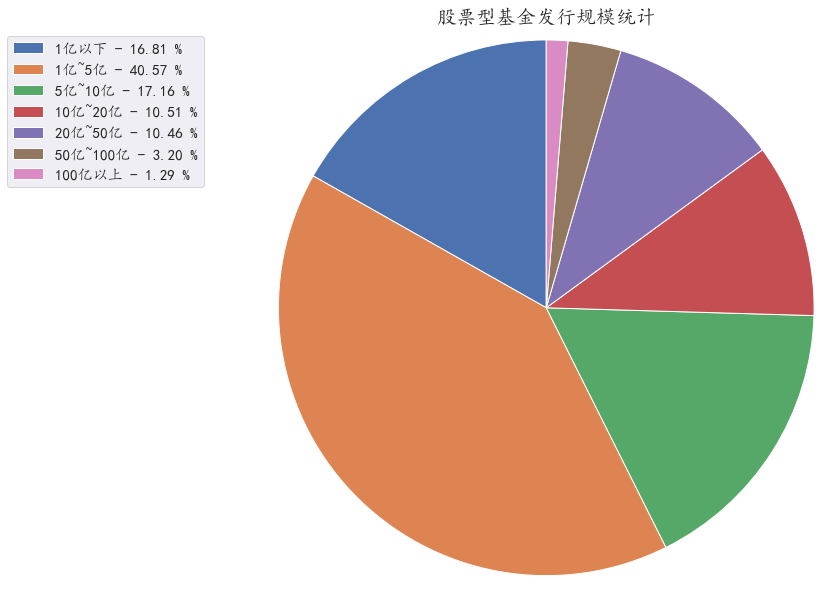

In [90]:
hihi = pd.read_csv("D:\\work\\project 6 基金持仓预测\\基金.csv", encoding="GBK")
hihi = hihi[hihi["发行日期"] != '——']
hihi = hihi[~hihi["发行日期"].isnull()]
hihi['发行日期'] = hihi['发行日期'].apply(lambda x: int(x.replace("-", "")))
hihi = hihi[(hihi["发行日期"]<=20200101) & (hihi["发行日期"]>=20050101)]
hihi = hihi[hihi["发行总份额\r\n[单位]份"] != '——']
hihi["发行总份额\r\n[单位]份"] = hihi["发行总份额\r\n[单位]份"].apply(lambda x: float(x.replace(",", "")))
display(hihi["发行总份额\r\n[单位]份"].describe([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 0.956]))
hihi["cat"] = np.where(hihi["发行总份额\r\n[单位]份"] <= 100000000, "1亿以下", np.where(
hihi["发行总份额\r\n[单位]份"] <= 500000000, "1亿~5亿", np.where(
hihi["发行总份额\r\n[单位]份"] <= 1000000000, "5亿~10亿", np.where(
hihi["发行总份额\r\n[单位]份"] <= 2000000000, "10亿~20亿", np.where(
hihi["发行总份额\r\n[单位]份"] <= 5000000000, "20亿~50亿", np.where(
hihi["发行总份额\r\n[单位]份"] <= 10000000000, "50亿~100亿", "100亿以上"))))))
re = hihi.groupby("cat")["发行日期"].count().reindex(["1亿以下", "1亿~5亿", "5亿~10亿", "10亿~20亿", "20亿~50亿", "50亿~100亿", "100亿以上"]).reset_index()
fig1, ax1 = plt.subplots()
x = re["cat"].values
y = re["发行日期"].values

porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*(zip(patches, labels, y)))

plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=15)
plt.title("股票型基金发行规模统计", fontsize=20)

from pylab import rcParams
rcParams['figure.figsize'] = 10, 20

plt.savefig('piechart.png', bbox_inches='tight',dpi=100)

In [73]:
labels

('1亿以下 - 16.81 %',
 '1亿~5亿 - 40.57 %',
 '5亿~10亿 - 17.16 %',
 '10亿~20亿 - 10.51 %',
 '20亿~50亿 - 10.46 %',
 '50亿~100亿 - 3.20 %',
 '100亿以上 - 1.29 %')

# 事件分析

In [20]:
fund = pd.read_csv("F:\\全部基金（含未成立、已到期）.csv", encoding="GBK")
set(fund['行业一'].unique())| set(fund['行业二'].unique()) | set(fund['行业三'].unique()) | set(fund['行业四'].unique())
fund['行业一'] = fund['行业一'].map({'云计算':'计算机', '交运物流':'交通运输', '保险':'非银金融','农牧饲渔':"农林牧渔", '券商信托':'非银金融', '医疗行业':'医药生物',
                '医药制造':'医药生物', '医药行业':'医药生物', '园林工程':'建筑装饰', '国际原油':'采掘', '家电行业':'家用电器', "工程建设":'建筑装饰',
                '房地产':'房地产', '文化传媒':'传媒', '新零售概念':'商业贸易', "机械行业":'机械设备', '材料行业':'化工', '水泥建材':'建筑材料',
                '汽车行业':'汽车', '消费':'食品饮料','煤炭采选':'采掘','环保工程':'公用事业', '电力行业':'公用事业', '电子信息':'电子', '电子元件':'电子',
                '航天航空':'国防军工', '贵金属':'有色金属', '软件服务':'计算机', '输配电气':'电气设备', '通讯行业':'通信', '酿酒行业':'食品饮料',
                '金融地产':'房地产', '钢铁行业':'钢铁', '银行':'银行', '食品行业':'食品饮料', '食品饮料':'食品饮料'})
fund['行业二'] = fund['行业二'].map({'云计算':'计算机', '交运物流':'交通运输', '保险':'非银金融','农牧饲渔':"农林牧渔", '券商信托':'非银金融', '医疗行业':'医药生物',
                '医药制造':'医药生物', '医药行业':'医药生物', '园林工程':'建筑装饰', '国际原油':'采掘', '家电行业':'家用电器', "工程建设":'建筑装饰',
                '房地产':'房地产', '文化传媒':'传媒', '新零售概念':'商业贸易', "机械行业":'机械设备', '材料行业':'化工', '水泥建材':'建筑材料',
                '汽车行业':'汽车', '消费':'食品饮料','煤炭采选':'采掘','环保工程':'公用事业', '电力行业':'公用事业', '电子信息':'电子', '电子元件':'电子',
                '航天航空':'国防军工', '贵金属':'有色金属', '软件服务':'计算机', '输配电气':'电气设备', '通讯行业':'通信', '酿酒行业':'食品饮料',
                '金融地产':'房地产', '钢铁行业':'钢铁', '银行':'银行', '食品行业':'食品饮料', '食品饮料':'食品饮料'})
fund['行业三'] = fund['行业三'].map({'云计算':'计算机', '交运物流':'交通运输', '保险':'非银金融','农牧饲渔':"农林牧渔", '券商信托':'非银金融', '医疗行业':'医药生物',
                '医药制造':'医药生物', '医药行业':'医药生物', '园林工程':'建筑装饰', '国际原油':'采掘', '家电行业':'家用电器', "工程建设":'建筑装饰',
                '房地产':'房地产', '文化传媒':'传媒', '新零售概念':'商业贸易', "机械行业":'机械设备', '材料行业':'化工', '水泥建材':'建筑材料',
                '汽车行业':'汽车', '消费':'食品饮料','煤炭采选':'采掘','环保工程':'公用事业', '电力行业':'公用事业', '电子信息':'电子', '电子元件':'电子',
                '航天航空':'国防军工', '贵金属':'有色金属', '软件服务':'计算机', '输配电气':'电气设备', '通讯行业':'通信', '酿酒行业':'食品饮料',
                '金融地产':'房地产', '钢铁行业':'钢铁', '银行':'银行', '食品行业':'食品饮料', '食品饮料':'食品饮料'})
fund['行业四'] = fund['行业四'].map({'云计算':'计算机', '交运物流':'交通运输', '保险':'非银金融','农牧饲渔':"农林牧渔", '券商信托':'非银金融', '医疗行业':'医药生物',
                '医药制造':'医药生物', '医药行业':'医药生物', '园林工程':'建筑装饰', '国际原油':'采掘', '家电行业':'家用电器', "工程建设":'建筑装饰',
                '房地产':'房地产', '文化传媒':'传媒', '新零售概念':'商业贸易', "机械行业":'机械设备', '材料行业':'化工', '水泥建材':'建筑材料',
                '汽车行业':'汽车', '消费':'食品饮料','煤炭采选':'采掘','环保工程':'公用事业', '电力行业':'公用事业', '电子信息':'电子', '电子元件':'电子',
                '航天航空':'国防军工', '贵金属':'有色金属', '软件服务':'计算机', '输配电气':'电气设备', '通讯行业':'通信', '酿酒行业':'食品饮料',
                '金融地产':'房地产', '钢铁行业':'钢铁', '银行':'银行', '食品行业':'食品饮料', '食品饮料':'食品饮料'})
fund = fund[fund["证监会基金类型"].isin(["混合型基金", "股票型基金"])]
fund.loc[fund['发行总份额\r\n[单位]份'] == '——', '发行总份额\r\n[单位]份'] = np.nan
fund.loc[fund['基金资产净值\r\n[报告期]最新一期\r\n[单位]元'] == '——', '基金资产净值\r\n[报告期]最新一期\r\n[单位]元'] = np.nan
fund[['发行总份额\r\n[单位]份', '基金资产净值\r\n[报告期]最新一期\r\n[单位]元']] = \
fund[['发行总份额\r\n[单位]份', '基金资产净值\r\n[报告期]最新一期\r\n[单位]元']].fillna('-1')
fund['发行总份额\r\n[单位]份'] = fund['发行总份额\r\n[单位]份'].apply(lambda x: float(x.replace(',','')))
fund['基金资产净值\r\n[报告期]最新一期\r\n[单位]元'] = fund['基金资产净值\r\n[报告期]最新一期\r\n[单位]元'].apply(lambda x: float(x.replace(',','')))
for cols in ['发行总份额\r\n[单位]份', '基金资产净值\r\n[报告期]最新一期\r\n[单位]元']:
    fund[cols] = np.where(fund[cols]== -1, np.nan, fund[cols])

fund['申万一级行业'] = np.nan
fund = fund.reset_index(drop=True)
for i in range(fund.shape[0]):
    if len(fund[["行业一", "行业二", "行业三", "行业四"]].iloc[i].dropna().values) != 0:
        fund.loc[i, "申万一级行业"] = ','.join(fund[["行业一", "行业二", "行业三", "行业四"]].iloc[i].dropna().unique())
fund = fund[['证券代码', '证券名称', '基金管理人简称', '证监会基金类型', '发行总份额\r\n[单位]份',
       '基金资产净值\r\n[报告期]最新一期\r\n[单位]元', 'Choice主题类型\r\n[基金主题分类]行业板块',
        '申万一级行业', '基金成立日', '基金到期日', '个人投资者认购终止日', '机构投资者设立认购终止日']]
fund.to_csv("F:\\公募基金规模.csv", encoding="GBK")

In [47]:
fund = pd.read_csv("C:\\Users\\win\\Desktop\\work\\project 6 基金持仓预测\\全部基金.csv", encoding="GBK")
set(fund['行业一'].unique())| set(fund['行业二'].unique()) | set(fund['行业三'].unique())
# fund.iloc[:,3].map({'消费':'1'})
fund['行业一'] = fund['行业一'].map({'云计算':'计算机', '交运物流':'交通运输', '保险':'非银金融','农牧饲渔':"农林牧渔", '券商信托':'非银金融', '医疗行业':'医药生物',
                '医药制造':'医药生物', '医药行业':'医药生物', '园林工程':'建筑装饰', '国际原油':'采掘', '家电行业':'家用电器', "工程建设":'建筑装饰',
                '房地产':'房地产', '文化传媒':'传媒', '新零售概念':'商业贸易', "机械行业":'机械设备', '材料行业':'化工', '水泥建材':'建筑材料',
                '汽车行业':'汽车', '消费':'食品饮料','煤炭采选':'采掘','环保工程':'公用事业', '电力行业':'公用事业', '电子信息':'电子', '电子元件':'电子',
                '航天航空':'国防军工', '贵金属':'有色金属', '软件服务':'计算机', '输配电气':'电气设备', '通讯行业':'通信', '酿酒行业':'食品饮料',
                '金融地产':'房地产', '钢铁行业':'钢铁', '银行':'银行', '食品行业':'食品饮料', '食品饮料':'食品饮料'})
fund['行业二'] = fund['行业二'].map({'云计算':'计算机', '交运物流':'交通运输', '保险':'非银金融','农牧饲渔':"农林牧渔", '券商信托':'非银金融', '医疗行业':'医药生物',
                '医药制造':'医药生物', '医药行业':'医药生物', '园林工程':'建筑装饰', '国际原油':'采掘', '家电行业':'家用电器', "工程建设":'建筑装饰',
                '房地产':'房地产', '文化传媒':'传媒', '新零售概念':'商业贸易', "机械行业":'机械设备', '材料行业':'化工', '水泥建材':'建筑材料',
                '汽车行业':'汽车', '消费':'食品饮料','煤炭采选':'采掘','环保工程':'公用事业', '电力行业':'公用事业', '电子信息':'电子', '电子元件':'电子',
                '航天航空':'国防军工', '贵金属':'有色金属', '软件服务':'计算机', '输配电气':'电气设备', '通讯行业':'通信', '酿酒行业':'食品饮料',
                '金融地产':'房地产', '钢铁行业':'钢铁', '银行':'银行', '食品行业':'食品饮料', '食品饮料':'食品饮料'})
fund['行业三'] = fund['行业三'].map({'云计算':'计算机', '交运物流':'交通运输', '保险':'非银金融','农牧饲渔':"农林牧渔", '券商信托':'非银金融', '医疗行业':'医药生物',
                '医药制造':'医药生物', '医药行业':'医药生物', '园林工程':'建筑装饰', '国际原油':'采掘', '家电行业':'家用电器', "工程建设":'建筑装饰',
                '房地产':'房地产', '文化传媒':'传媒', '新零售概念':'商业贸易', "机械行业":'机械设备', '材料行业':'化工', '水泥建材':'建筑材料',
                '汽车行业':'汽车', '消费':'食品饮料','煤炭采选':'采掘','环保工程':'公用事业', '电力行业':'公用事业', '电子信息':'电子', '电子元件':'电子',
                '航天航空':'国防军工', '贵金属':'有色金属', '软件服务':'计算机', '输配电气':'电气设备', '通讯行业':'通信', '酿酒行业':'食品饮料',
                '金融地产':'房地产', '钢铁行业':'钢铁', '银行':'银行', '食品行业':'食品饮料', '食品饮料':'食品饮料'})
fund = fund.dropna(subset=['个人投资者认购终止日', '发行总份额\r\n[单位]份'])
fund['个人投资者认购终止日'] = fund['个人投资者认购终止日'].apply(lambda x: int(x.split('/')[0] + x.split('/')[1].rjust(2,'0') + x.split('/')[2].rjust(2,'0')))
fund['发行总份额\r\n[单位]份'] = fund['发行总份额\r\n[单位]份'].apply(lambda x: float(x.replace(',','')))
li_st = list(set(fund['行业一'].unique())| set(fund['行业二'].unique()) | set(fund['行业三'].unique()))[1:]

In [48]:
import glob
path = r'C:\Users\win\Desktop\work\project 6 基金持仓预测\行业'
all_files = glob.glob(path + "/*.csv")
sw = pd.DataFrame()
for i in range(len(all_files)):
    dn = pd.read_csv(all_files[i], encoding="GBK")
    dn["行业"] = all_files[i].split('.')[0].split('\\')[-1]
    sw = pd.concat([sw, dn], axis = 0, ignore_index = True)
sw['截止日期'] = sw['截止日期'].apply(lambda x: int(x.split('/')[0] + x.split('/')[1].rjust(2,'0') + x.split('/')[2].rjust(2,'0')))
sw = sw.sort_values(by=['行业', '截止日期']).reset_index().iloc[:, 1:]
sw

,截止日期,开盘点位,最高点位,最低点位,收盘点位,区间涨跌幅[%],区间成交金额[百万],区间成交量[百万],区间换手率[%],行业
0,20020801,"1,293.66","1,305.65","1,281.80","1,294.03",-0.1597,475.84,56.24,0.6959,交通运输
1,20020802,"1,296.13","1,305.97","1,287.55","1,298.90",0.3763,321.87,37.27,0.4612,交通运输
2,20020805,"1,298.36","1,304.47","1,284.32","1,292.77",-0.4719,371.75,43.18,0.5343,交通运输
3,20020806,"1,290.50","1,321.01","1,283.79","1,307.09",1.1077,890.5,117.24,1.4508,交通运输
4,20020807,"1,306.07","1,314.35","1,297.52","1,305.43",-0.1270,351.36,43.01,0.5322,交通运输
...,...,...,...,...,...,...,...,...,...,...
118519,20191225,"15,098.15","15,098.38","14,921.47","14,969.31",-0.8990,"13,471.80",517.7808,0.8032,食品饮料
118520,20191226,"14,970.39","15,029.52","14,894.66","15,013.75",0.2969,"12,797.86",489.0694,0.7587,食品饮料
118521,20191227,"15,109.14","15,319.22","15,109.12","15,215.19",1.3417,"20,931.44",673.2166,1.0443,食品饮料
118522,20191230,"15,252.67","15,588.82","15,237.03","15,531.41",2.0783,"25,478.73",825.0721,1.2776,食品饮料


In [49]:
import glob
path = r'C:\Users\win\Desktop\work\project 6 基金持仓预测\市值'
all_files = glob.glob(path + "/*.csv")
mv = pd.DataFrame()
for i in range(len(all_files)):
    dn = pd.read_csv(all_files[i], encoding="GBK")
    dn["行业"] = all_files[i].split('.')[0].split('\\')[-1]
    mv = pd.concat([mv, dn], axis = 0, ignore_index = True)
mv['截止日期'] = mv['截止日期'].apply(lambda x: int(x.replace('-','').replace('/','')))
mv = mv.sort_values(by=['行业', '截止日期']).reset_index().iloc[:, 1:]
mv['总市值[亿]'] = mv['总市值[亿]'].apply(lambda x: float(x.replace(',','')))
mv['流通市值[亿]'] = mv['流通市值[亿]'].apply(lambda x: float(x.replace(',','')))
mv

,截止日期,市盈率,市净率,市现率,市销率,每股收益[元],每股净资产[元],净资产收益率[%],总市值[亿],流通市值[亿],行业
0,20020801,49.9694,3.4674,36.5897,7.5758,0.1592,2.5286,6.2945,3503.8193,741.4630,交通运输
1,20020802,50.2063,3.4760,36.6917,7.5874,0.1588,2.5286,6.2806,3512.5089,744.3290,交通运输
2,20020805,49.6345,3.4492,37.2173,7.5053,0.1594,2.5286,6.3042,3485.4682,740.8077,交通运输
3,20020806,50.2685,3.4946,37.7451,7.6023,0.1595,2.5286,6.3095,3531.2919,749.2918,交通运输
4,20020807,50.1131,3.4840,37.6401,7.5792,0.1595,2.5286,6.3095,3520.5858,747.9370,交通运输
...,...,...,...,...,...,...,...,...,...,...,...
88060,20191225,31.3359,6.5517,51.9117,5.5955,1.5093,7.3565,20.5168,37851.3354,34344.7776,食品饮料
88061,20191226,31.4252,6.5709,52.0601,5.6118,1.5093,7.3566,20.5168,37961.6265,34434.9087,食品饮料
88062,20191227,31.8401,6.6573,52.7908,5.6853,1.5093,7.3566,20.5168,38459.2285,34926.9017,食品饮料
88063,20191230,32.5116,6.7969,54.0057,5.8044,1.5094,7.3567,20.5168,39264.7852,35699.3385,食品饮料


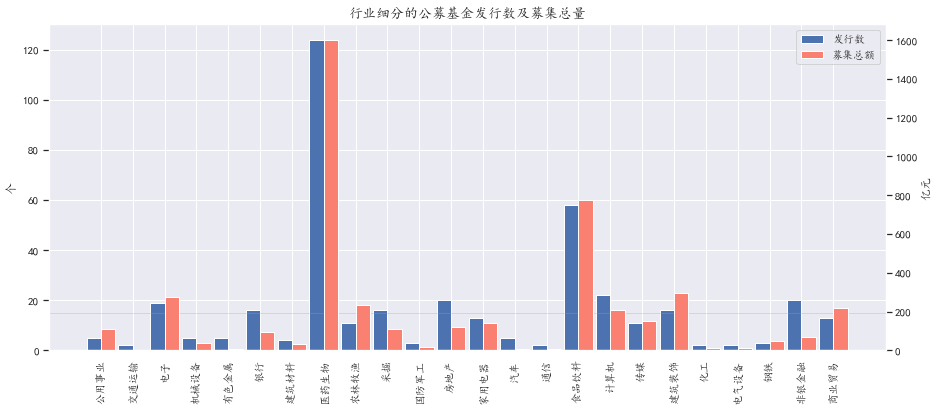

,行业,发行数,募集总额 (亿元)
0,公用事业,5,110.72
1,交通运输,2,2.36
2,电子,19,276.89
3,机械设备,5,37.51
4,有色金属,5,7.32
5,银行,16,92.06
6,建筑材料,4,30.26
7,医药生物,124,1602.39
8,农林牧渔,11,232.78
9,采掘,16,108.44


In [50]:
ll =list(set(fund['行业一'].unique())| set(fund['行业二'].unique()) | set(fund['行业三'].unique()))[1:]
pp = []
yy = []
for j in ll:
    ff = fund[(fund['行业一'] == j) | (fund['行业二'] == j) | (fund['行业三'] == j)]
    pp.append(len(ff))
    yy.append(round(ff['发行总份额\r\n[单位]份'].sum()/100000000,2))
df = pd.DataFrame()
df['行业'] = ll
df["发行数"] = pp
df['募集总额 (亿元)'] = yy

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Kaiti']
mpl.rcParams['axes.unicode_minus'] = False

fig, ax1 = plt.subplots(figsize=(15, 6))
width = 0.45
ax1.bar(np.arange(24)-width/2, df['发行数'], width = width, label='发行数')
ax1.set_ylabel("个")
ax1.axhline(y=15, color='salmon', linestyle=(0, (1, 1)), alpha=0.6, linewidth=1)
plt.xticks(np.arange(24), df['行业'],rotation=90)
ax2 = ax1.twinx()
ax2.bar(np.arange(24)+width/2, df['募集总额 (亿元)'], color='salmon', alpha=1, width=width, label='募集总额')
ax2.set_ylabel("亿元")
ax2.grid(None)
plt.title("行业细分的公募基金发行数及募集总量", fontsize=14)
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.show()

df

In [51]:
ll =list(set(fund['行业一'].unique())| set(fund['行业二'].unique()) | set(fund['行业三'].unique()))[1:]
mean = []
median = []


for j in ll:
    ff = fund[(fund['行业一'] == j) | (fund['行业二'] == j) | (fund['行业三'] == j)]
    ratio = []
    for i in ff['个人投资者认购终止日'].index:
        d = ff.loc[i, '个人投资者认购终止日']
        da_te = mv[mv['行业'] == j]['截止日期']
        if len(da_te[da_te == d]) == 0:
            if len(da_te[da_te < d]) == 0:
#                 print(j)
#                 print(ff.loc[i, :])
#                 print(da_te)
#                 print('----------_________________________________')
                continue
            else:
                d = da_te[da_te < d].iloc[-1]
        r = ff.loc[i, '发行总份额\r\n[单位]份']/mv[(mv['行业'] == j) & (mv['截止日期'] == d)]['流通市值[亿]'].values[0]/1e8
        ratio.append(r)
    m1 = np.mean(ratio)
    m2 = np.median(ratio)
    m3 = np.sum(ratio)
    mean.append('%.3f%%'%(100*m1))
    median.append('%.3f%%'%(100*m2))

df1 = pd.DataFrame()
df1['行业'] = ll
df1['比例平均数'] = mean
df1['比例中位数'] = median
df = pd.merge(df, df1, on='行业')
df = df.sort_values(by=['比例平均数', '发行数'], ascending=False).reset_index(drop=True)

In [52]:
new = pd.merge(sw, CSI500.loc[:,['截止日期','区间涨跌幅[%]']], on=['截止日期'], how='inner')
new = new.sort_values(by=['行业','截止日期'])
new['ret'] = new['区间涨跌幅[%]_x'] - new['区间涨跌幅[%]_y']
new = new.reset_index(drop=True)

In [36]:
new

,截止日期,开盘点位,最高点位,最低点位,收盘点位,区间涨跌幅[%]_x,区间成交金额[百万],区间成交量[百万],区间换手率[%],行业,区间涨跌幅[%]_y,ret
0,20050104,"1,184.06","1,188.20","1,172.77","1,176.12",-1.4100,442.63,66.61,0.5328,交通运输,0.0000,-1.4100
1,20050105,"1,173.45","1,190.92","1,170.79","1,187.60",0.9761,412.92,65.63,0.525,交通运输,1.6927,-0.7166
2,20050106,"1,189.93","1,189.93","1,181.03","1,184.82",-0.2341,486.28,74.12,0.5929,交通运输,-0.9005,0.6664
3,20050107,"1,183.72","1,196.27","1,180.78","1,183.48",-0.1131,621.4,93.91,0.7512,交通运输,0.3027,-0.4158
4,20050110,"1,182.03","1,192.15","1,177.88","1,191.46",0.6743,515.63,77.53,0.6202,交通运输,0.8752,-0.2009
...,...,...,...,...,...,...,...,...,...,...,...,...
102083,20191225,"15,098.15","15,098.38","14,921.47","14,969.31",-0.8990,"13,471.80",517.7808,0.8032,食品饮料,0.4074,-1.3064
102084,20191226,"14,970.39","15,029.52","14,894.66","15,013.75",0.2969,"12,797.86",489.0694,0.7587,食品饮料,0.6954,-0.3985
102085,20191227,"15,109.14","15,319.22","15,109.12","15,215.19",1.3417,"20,931.44",673.2166,1.0443,食品饮料,-0.7654,2.1071
102086,20191230,"15,252.67","15,588.82","15,237.03","15,531.41",2.0783,"25,478.73",825.0721,1.2776,食品饮料,1.2115,0.8668


C:\Users\win\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


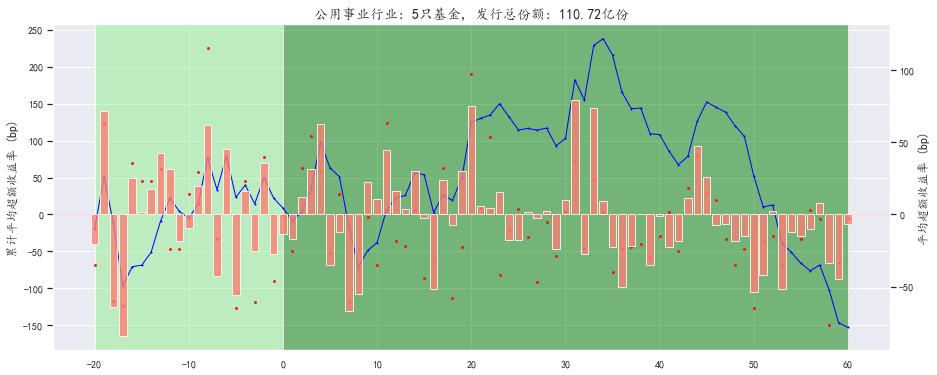

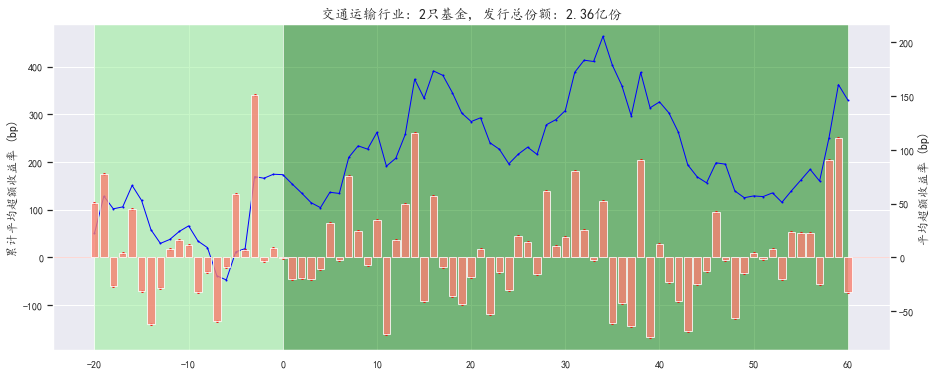

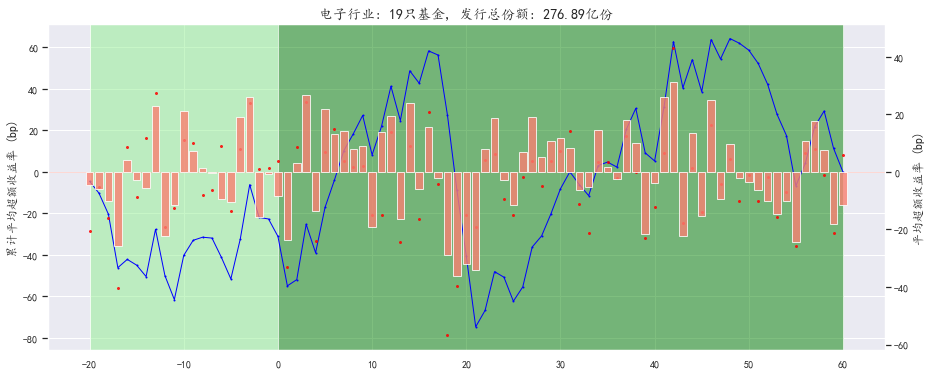

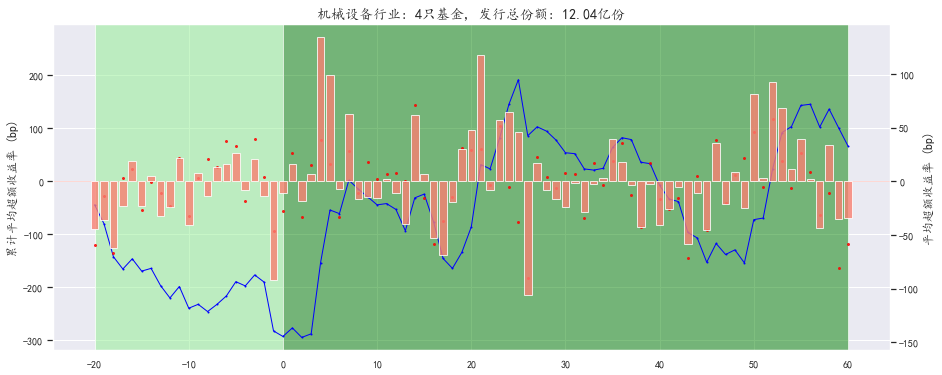

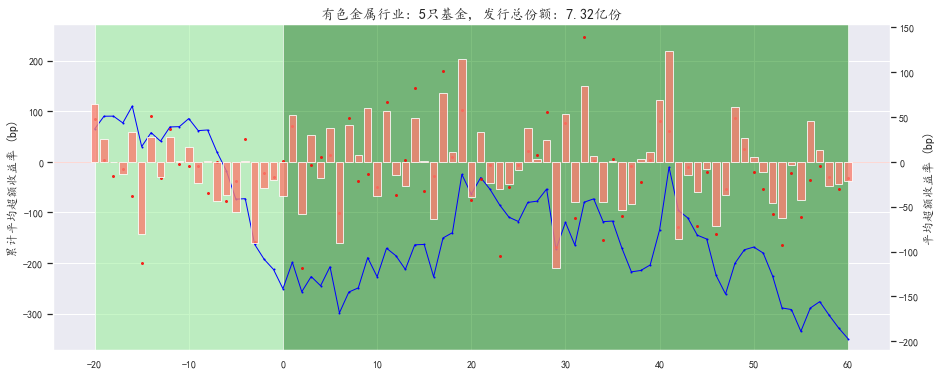

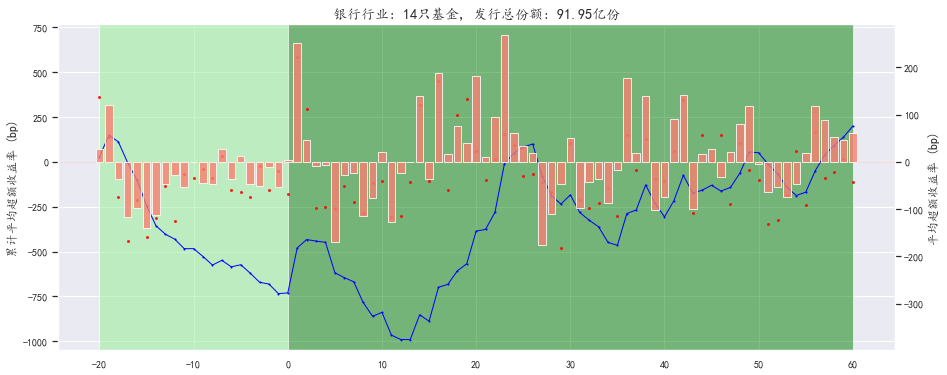

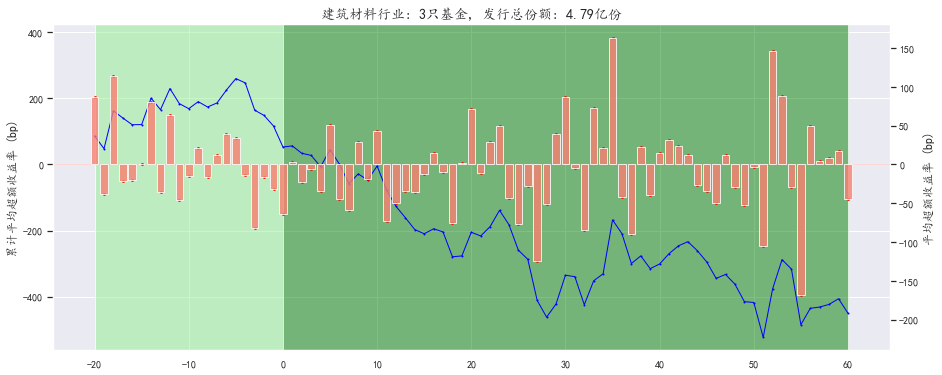

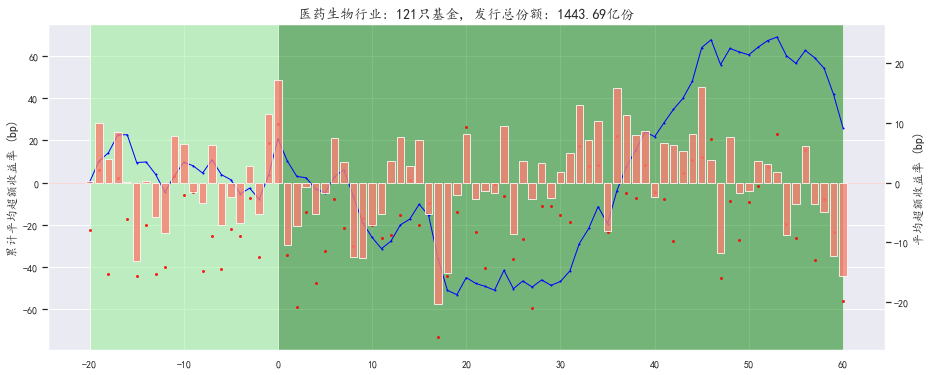

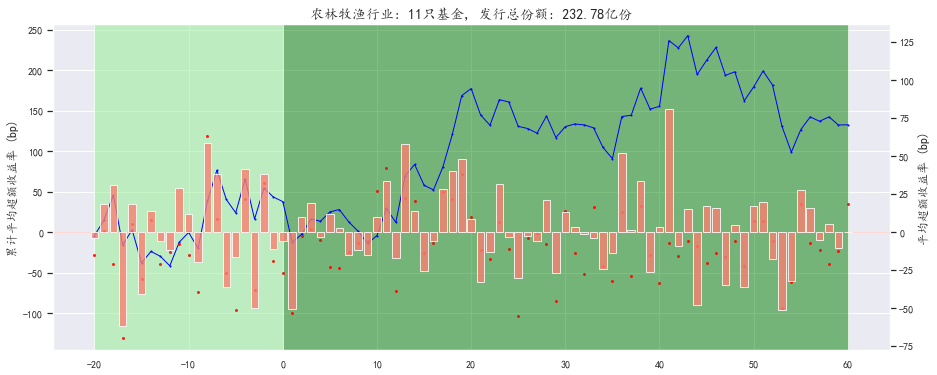

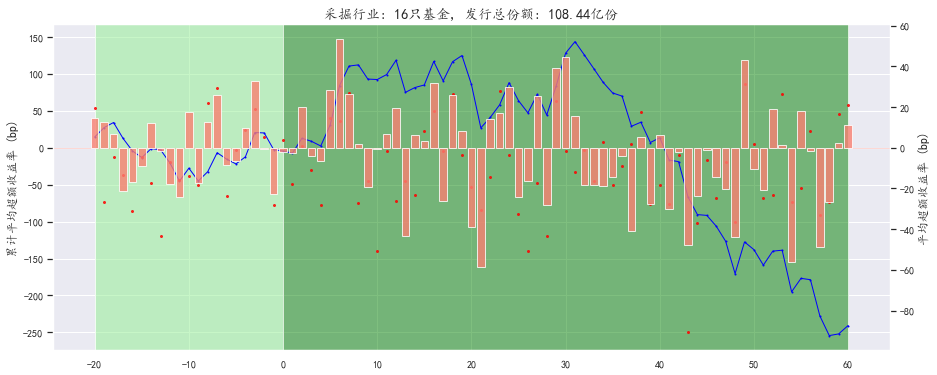

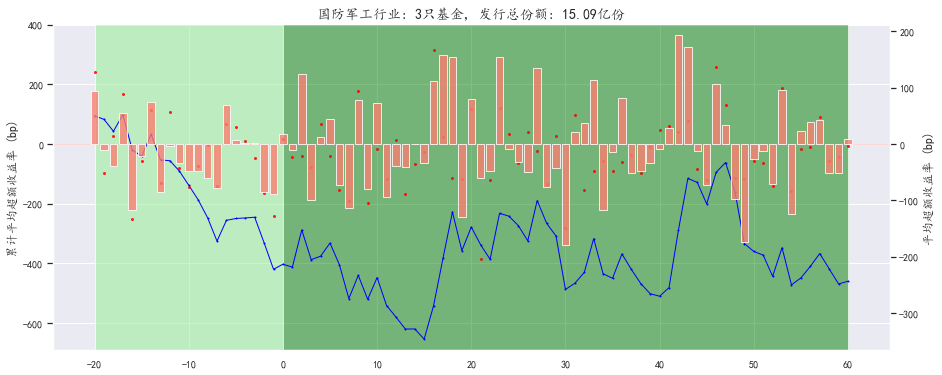

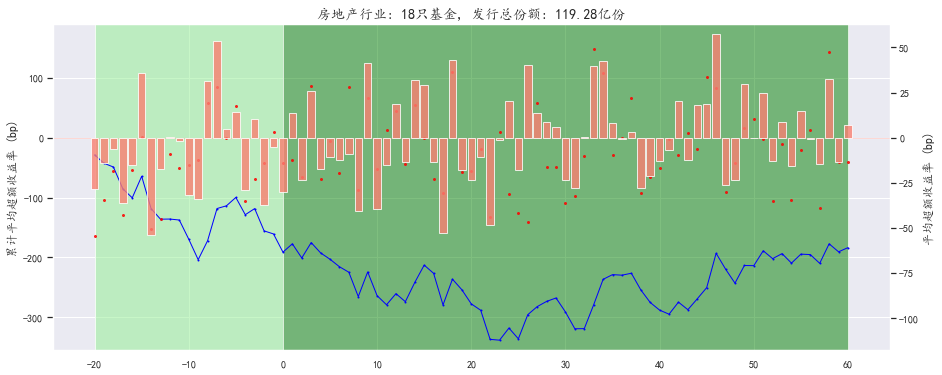

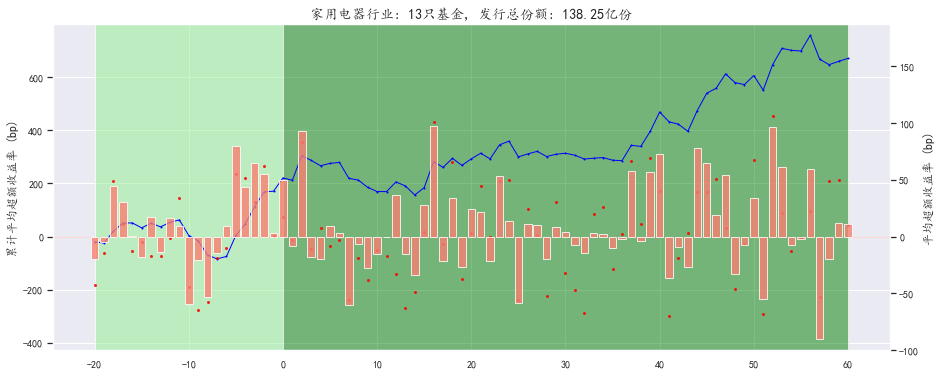

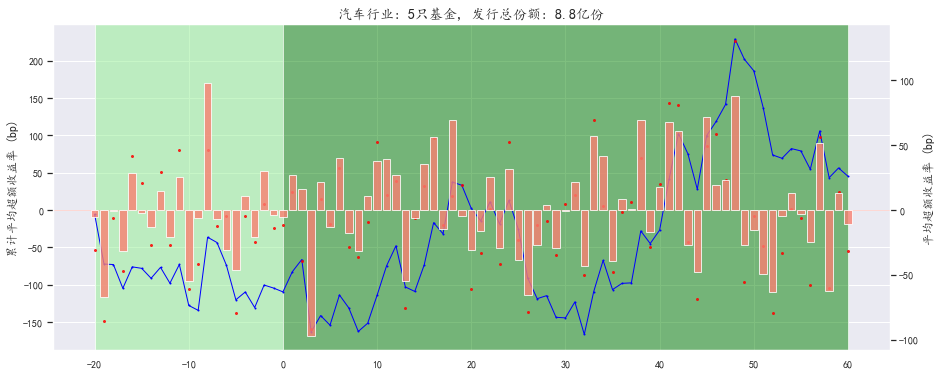

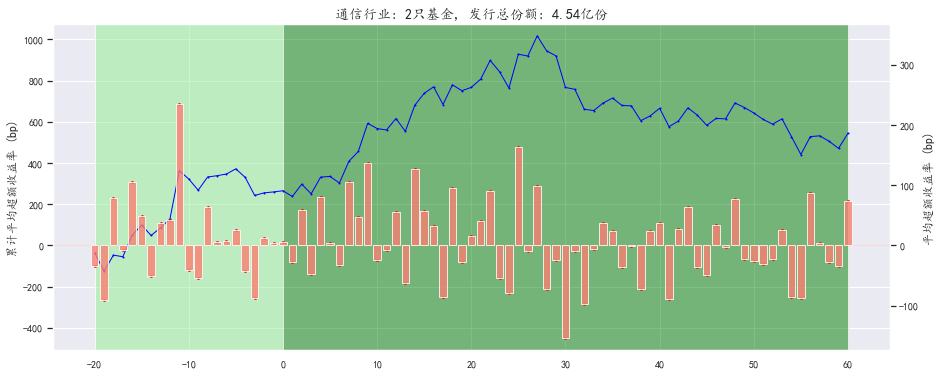

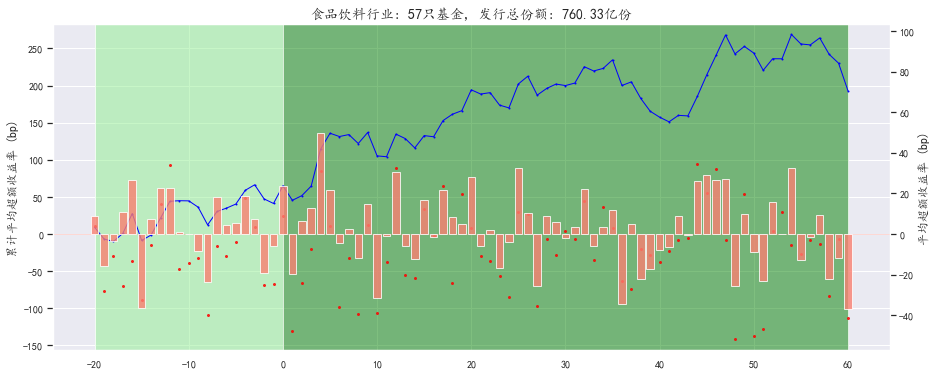

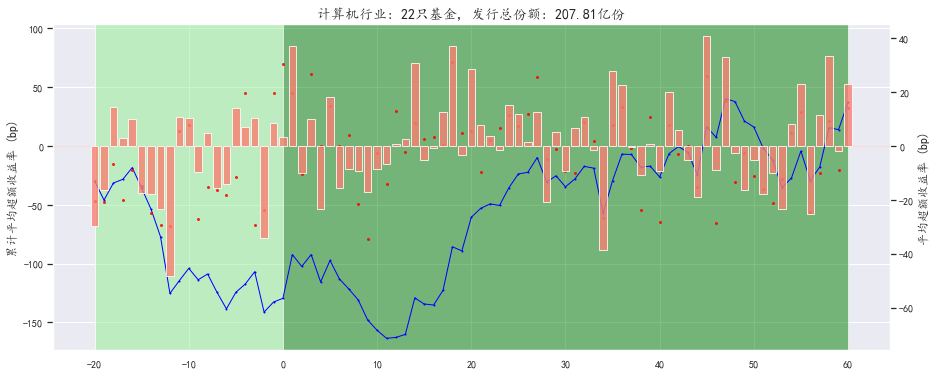

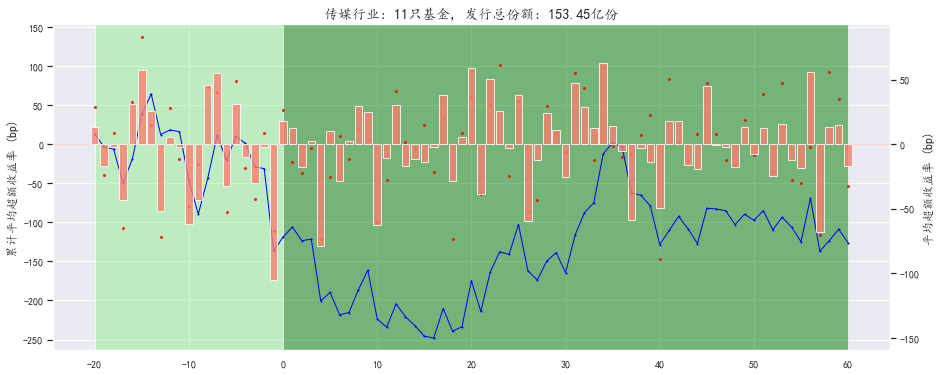

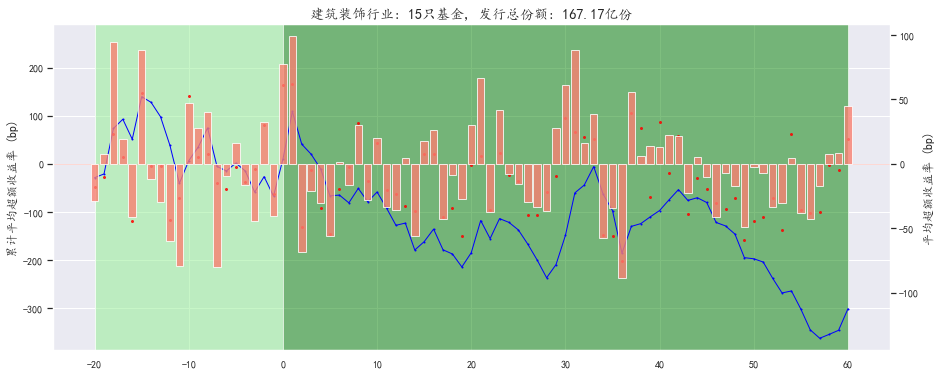

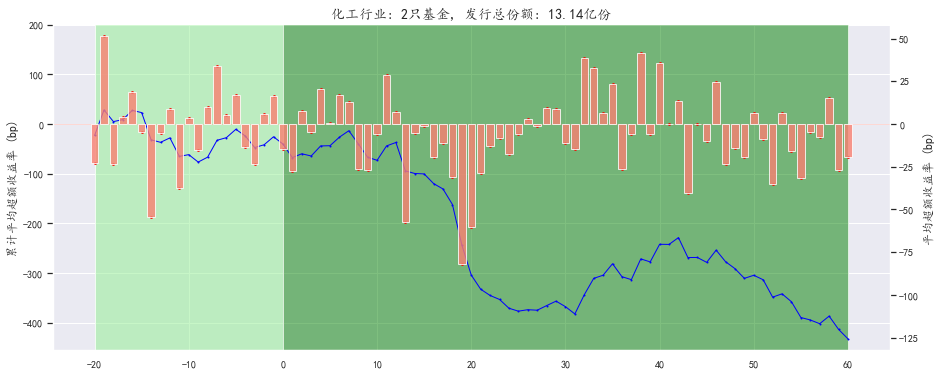

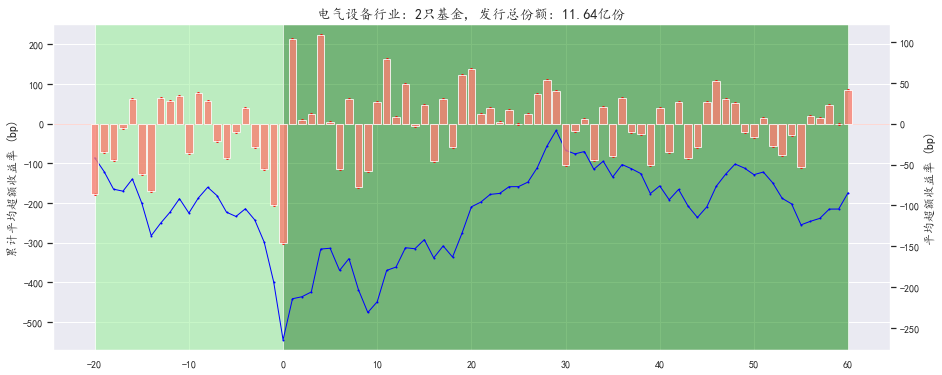

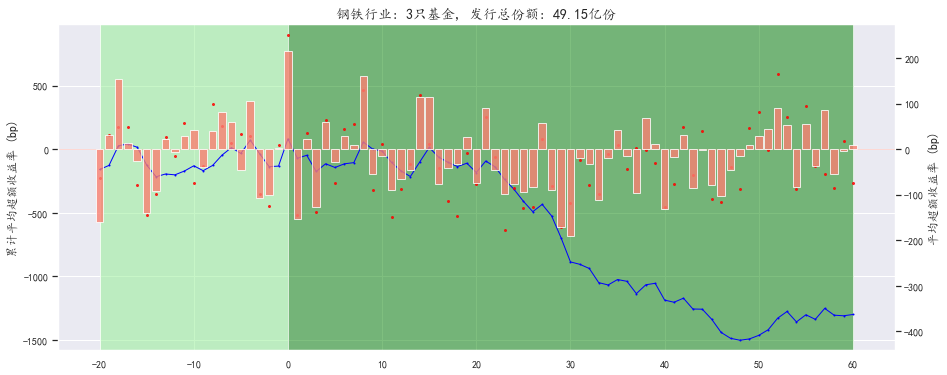

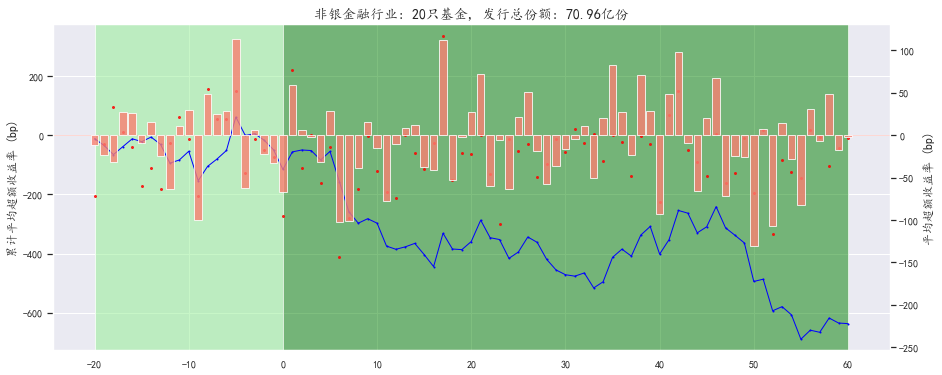

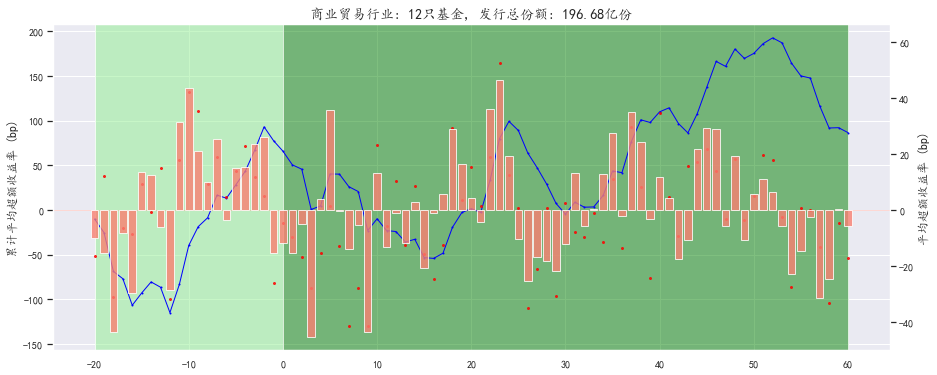

In [53]:
def cal(j):
    ff = fund[(fund['行业一'] == li_st[j]) | (fund['行业二'] == li_st[j]) | (fund['行业三'] == li_st[j])]
    dates = ff['个人投资者认购终止日'].unique()
    df = pd.DataFrame()
    m1 = []
    for i in dates:
        i1 = i
        da_te = new[new['行业'] == li_st[j]]['截止日期']
        if len(da_te[da_te == i]) == 0:
            if  len(da_te[da_te < i]) != 0:
                i = da_te[da_te < i].iloc[-1]
            else:
                continue
            
        if da_te[da_te == i].index[0] - 20 < da_te.index[0]:
            continue
        else:
            d1 = da_te[da_te[da_te == i].index[0] - 20]

        if da_te[da_te == i].index[0] + 60 > da_te.index[-1]:
            continue
        else:
            d2 = da_te[da_te[da_te == i].index[0] + 60]
            
        tp = new[(new['行业'] == li_st[j]) & (new["截止日期"] <= d2) & (new["截止日期"] >= d1)]['ret'].reset_index().iloc[:, 1:]
        df = pd.concat([df, tp], axis=1)
        m1.append(i1)
    CAR = np.cumsum(df.mean(axis=1)) * 100
    T = df.mean(axis=1) * 100
    M = df.median(axis=1) * 100
    choosen = ff[ff['个人投资者认购终止日'].isin(m1)]
    m = len(choosen)
    v = choosen['发行总份额\r\n[单位]份'].sum()
    ratio = []
    for i in choosen['个人投资者认购终止日'].index:
        d = choosen.loc[i, '个人投资者认购终止日']
        da_te = mv[mv['行业'] == li_st[j]]['截止日期']
        if len(da_te[da_te == d]) == 0:
            if len(da_te[da_te < d]) == 0:
                continue
            else:
                d = da_te[da_te < d].iloc[-1]
        r = choosen.loc[i, '发行总份额\r\n[单位]份']/mv[(mv['行业'] == li_st[j]) & (mv['截止日期'] == d)]['流通市值[亿]'].values[0]/1e8
        ratio.append(r)
    m1 = np.mean(ratio)
    m2 = np.median(ratio)
    return pd.DataFrame({"CAR": CAR, "T value": T, "fund number": m, "Median_alpha": M, 'value': v, 'mean':'%.3f%%'%(100*m1), 'median':'%.3f%%'%(100*m2)})

def align_yaxis_np(ax1, ax2):
    """Align zeros of the two axes, zooming them out by same ratio"""
    axes = np.array([ax1, ax2])
    extrema = np.array([ax.get_ylim() for ax in axes])
    tops = extrema[:, 1] / (extrema[:, 1] - extrema[:, 0])
    # Ensure that plots (intervals) are ordered bottom to top:
    if tops[0] > tops[1]:
        axes, extrema, tops = [a[::-1] for a in (axes, extrema, tops)]

    # How much would the plot overflow if we kept current zoom levels?
    tot_span = tops[1] + 1 - tops[0]

    extrema[0, 1] = extrema[0, 0] + tot_span * (extrema[0, 1] - extrema[0, 0])
    extrema[1, 0] = extrema[1, 1] + tot_span * (extrema[1, 0] - extrema[1, 1])
    [axes[i].set_ylim(*extrema[i]) for i in range(2)]

import seaborn as sns

def hehe(p):
    x = range(-20, 61)
    sns.set()
    fig, ax1 = plt.subplots(figsize=(15, 6))
    r1 = cal(p)
    f1 = r1.loc[0, "fund number"]
    f2 = r1.loc[0, "value"]
    f3 = r1.loc[0, "mean"]
    f4 = r1.loc[0, "median"]
    len1 = r1.loc[0, "fund number"]
    ax1.axvspan(-20, 0, facecolor='lightgreen', alpha=0.5)
    ax1.axvspan(0, 60, facecolor='green', alpha=0.5)
    ax1.set_ylabel('累计平均超额收益率 (bp)', fontsize=12)
    ax1.plot(x, r1["CAR"], marker='.', color='blue', alpha=1, linewidth=1, markersize=2)
    ax1.tick_params('y')
    ax1.tick_params(labelsize=10)
    ax1.axhline(y=0, color='salmon', linestyle=(0, (1, 1)), alpha=0.6, linewidth=1)
    ax2 = ax1.twinx()
    ax2.set_ylabel('平均超额收益率 (bp)', fontsize=12)
    ax2.bar(x, r1["T value"], color='salmon', alpha=0.8)
    ax2.scatter(x, r1["Median_alpha"], color='red', alpha=0.8, s=4)
    ax2.tick_params('y')
    ax2.tick_params(labelsize=10)
    s_um = r1.loc[0, "value"]
    s_um = round(s_um/100000000,2)
    f2 = s_um
    plt.title(li_st[p] + '行业' + ': ' + str(len1) + "只基金," + ' 发行总份额: ' + str(s_um) + '亿份', fontsize=14)
    ax1.grid(True)
    ax2.grid(None)
    align_yaxis_np(ax1, ax2)
    plt.rcParams['font.sans-serif']=['KaiTi']
    plt.rcParams['axes.unicode_minus']=False
    plt.savefig("figure1")
    return [f1, f2, f3, f4]
    plt.show() 

ff1 = []
ff2 = []
ff3 = []
ff4 = []
for i in range(24):
    t = hehe(i)
    ff1.append(t[0])
    ff2.append(t[1])
    ff3.append(t[2])
    ff4.append(t[3])




,行业,发行数,募集总额（亿元）,比例平均数,比例中位数
0,农林牧渔,11,232.78,3.442%,0.269%
1,电子,19,276.89,0.953%,0.060%
2,公用事业,5,110.72,0.439%,0.306%
3,家用电器,13,138.25,0.376%,0.160%
4,食品饮料,57,760.33,0.332%,0.058%
5,钢铁,3,49.15,0.309%,0.239%
6,商业贸易,12,196.68,0.215%,0.160%
7,房地产,18,119.28,0.167%,0.029%
8,传媒,11,153.45,0.138%,0.074%
9,采掘,16,108.44,0.130%,0.018%


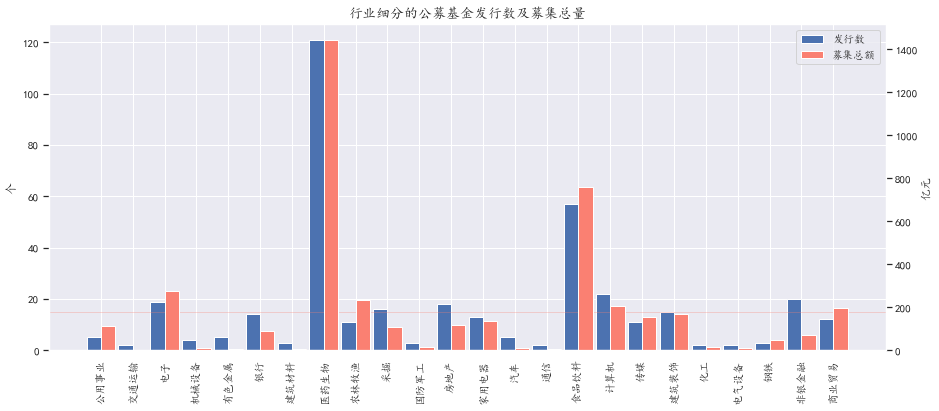

385

4207.2699999999995

In [54]:
df = pd.DataFrame()
df['行业'] = li_st
df['发行数'] = ff1
df['募集总额（亿元）'] = ff2
df['比例平均数'] = ff3
df['比例中位数'] = ff4
display(df.sort_values(by=['比例平均数', '发行数'], ascending=False).reset_index(drop=True))

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Kaiti']
mpl.rcParams['axes.unicode_minus'] = False

fig, ax1 = plt.subplots(figsize=(15, 6))
width = 0.45
ax1.bar(np.arange(24)-width/2, df['发行数'], width = width, label='发行数')
ax1.set_ylabel("个")
ax1.axhline(y=15, color='salmon', linestyle=(0, (1, 1)), alpha=0.6, linewidth=1)
plt.xticks(np.arange(24), df['行业'],rotation=90)
ax2 = ax1.twinx()
ax2.bar(np.arange(24)+width/2, df['募集总额（亿元）'], color='salmon', alpha=1, width=width, label='募集总额')
ax2.set_ylabel("亿元")
ax2.grid(None)
plt.title("行业细分的公募基金发行数及募集总量", fontsize=14)
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.show()

display(df['发行数'].sum())
display(df['募集总额（亿元）'].sum())

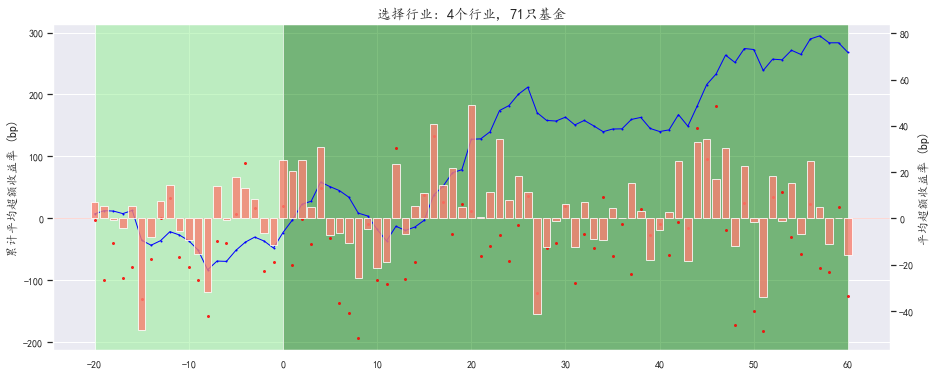

In [55]:
# li_st1 = df['行业'].iloc[:11]
# print(li_st1)
# li_st2 = ['农林渔牧', '家用电器', '食品饮料','国防军工', '银行', '通信','有色金属','机械设备','电气设备','汽车']
li_st2 = ['农林渔牧', '家用电器', '食品饮料','银行']
df = pd.DataFrame()
m = 0
n = 0
for j in li_st2:
    ff = fund[(fund['行业一'] == j) | (fund['行业二'] == j) | (fund['行业三'] == j)]
    dates = ff['个人投资者认购终止日'].unique()
    m = m + 1
    for i in dates:
        da_te = new[new['行业'] == j]['截止日期']
        if len(da_te[da_te == i]) == 0:
            if  len(da_te[da_te < i]) != 0:
                i = da_te[da_te < i].iloc[-1]
            else:
                continue
            
        if da_te[da_te == i].index[0] - 20 < da_te.index[0]:
            continue
        else:
            d1 = da_te[da_te[da_te == i].index[0] - 20]

        if da_te[da_te == i].index[0] + 60 > da_te.index[-1]:
            continue
        else:
            d2 = da_te[da_te[da_te == i].index[0] + 60]
            
        tp = new[(new['行业'] == j) & (new["截止日期"] <= d2) & (new["截止日期"] >= d1)]['ret'].reset_index().iloc[:, 1:]
        df = pd.concat([df, tp], axis=1)
        n = n + 1
CAR = np.cumsum(df.mean(axis=1)) * 100
T = df.mean(axis=1) * 100
M = df.median(axis=1) * 100
    

def align_yaxis_np(ax1, ax2):
    """Align zeros of the two axes, zooming them out by same ratio"""
    axes = np.array([ax1, ax2])
    extrema = np.array([ax.get_ylim() for ax in axes])
    tops = extrema[:, 1] / (extrema[:, 1] - extrema[:, 0])
    # Ensure that plots (intervals) are ordered bottom to top:
    if tops[0] > tops[1]:
        axes, extrema, tops = [a[::-1] for a in (axes, extrema, tops)]

    # How much would the plot overflow if we kept current zoom levels?
    tot_span = tops[1] + 1 - tops[0]

    extrema[0, 1] = extrema[0, 0] + tot_span * (extrema[0, 1] - extrema[0, 0])
    extrema[1, 0] = extrema[1, 1] + tot_span * (extrema[1, 0] - extrema[1, 1])
    [axes[i].set_ylim(*extrema[i]) for i in range(2)]

import seaborn as sns


x = range(-20, 61)
sns.set()
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.axvspan(-20, 0, facecolor='lightgreen', alpha=0.5)
ax1.axvspan(0, 60, facecolor='green', alpha=0.5)
ax1.set_ylabel('累计平均超额收益率 (bp)', fontsize=12)
ax1.plot(x, CAR, marker='.', color='blue', alpha=1, linewidth=1, markersize=2)
ax1.tick_params('y')
ax1.tick_params(labelsize=10)
ax1.axhline(y=0, color='salmon', linestyle=(0, (1, 1)), alpha=0.6, linewidth=1)
ax2 = ax1.twinx()
ax2.set_ylabel('平均超额收益率 (bp)', fontsize=12)
ax2.bar(x, T, color='salmon', alpha=0.8)
ax2.scatter(x, M, color='red', alpha=0.8, s=4)
ax2.tick_params('y')
ax2.tick_params(labelsize=10)
plt.title('选择行业' + ': ' + str(m) + "个行业, " + str(n) + '只基金', fontsize=14)
ax1.grid(True)
ax2.grid(None)
align_yaxis_np(ax1, ax2)
plt.rcParams['font.sans-serif']=['KaiTi']
plt.rcParams['axes.unicode_minus']=False
plt.savefig("figure1")
plt.show() 

